(300, 2)
(300,)
[[ 8.36856841e-01  2.13635938e+00]
 [-1.41365810e+00  7.40962324e+00]
 [ 1.15521298e+00  5.09961887e+00]
 [-1.01861632e+00  7.81491465e+00]
 [ 1.27135141e+00  1.89254207e+00]
 [ 3.43761754e+00  2.61654166e-01]
 [-1.80822253e+00  1.59701749e+00]
 [ 1.41372442e+00  4.38117707e+00]
 [-2.04932168e-01  8.43209665e+00]
 [-7.11099611e-01  8.66043846e+00]
 [-1.71237268e+00  2.77780226e+00]
 [-2.67000792e+00  8.35389140e+00]
 [ 1.24258802e+00  4.50399192e+00]
 [-2.22783649e+00  6.89479938e+00]
 [ 1.45513831e+00 -2.91989981e-02]
 [ 4.53791789e-01  3.95647753e+00]
 [ 1.06923853e+00  4.53068484e+00]
 [ 2.56936589e+00  5.07048304e-01]
 [-1.06690610e+00  3.13165795e+00]
 [-1.07859101e+00  2.20451529e+00]
 [ 2.71506328e+00  1.29082190e+00]
 [ 1.77710994e+00  1.18655254e+00]
 [ 7.34363910e-01  5.03725437e+00]
 [-1.99648151e+00  2.85164868e+00]
 [-1.91828017e+00  2.60516867e+00]
 [-5.55523811e-01  4.69595848e+00]
 [ 1.69747910e+00  8.66123282e-01]
 [ 5.94762432e-01  4.70964730e+00]
 [-2

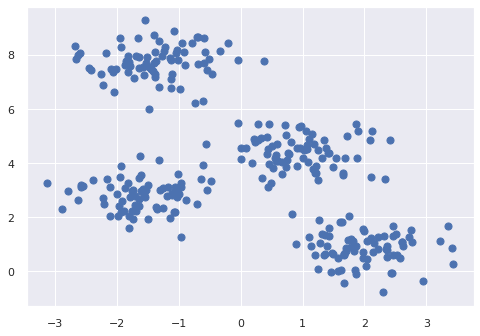

In [27]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

#from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
print(X.shape)
print(y_true.shape)
print(X)
print(y_true)

plt.scatter(X[:, 0], X[:, 1], s=50)

[2 1 3 1 2 2 0 3 1 1 0 1 3 1 2 3 3 2 0 0 2 2 3 0 0 3 2 3 0 3 1 1 3 1 1 1 1
 1 0 2 3 0 3 3 0 0 1 0 1 2 0 2 1 2 2 0 1 0 1 2 1 3 1 0 0 0 1 2 1 0 3 0 1 0
 0 1 0 3 2 1 2 3 2 2 1 3 2 3 1 1 3 2 1 0 0 3 2 2 3 0 1 2 1 2 3 2 2 3 1 3 0
 0 2 1 2 3 1 2 2 3 0 2 0 2 2 2 2 0 2 0 1 0 0 2 1 0 0 1 3 1 1 0 3 0 3 0 1 3
 1 1 1 3 1 3 2 0 1 0 2 3 1 3 3 2 3 0 0 3 2 3 3 1 2 3 0 1 2 2 3 0 2 3 0 0 3
 3 3 3 2 1 3 0 3 3 0 0 0 3 0 1 3 0 2 0 3 1 0 1 3 1 3 0 3 3 1 0 0 2 2 3 1 2
 2 0 2 0 3 1 1 3 3 1 3 2 0 3 2 0 1 0 2 3 2 1 1 1 1 0 0 1 3 0 2 3 0 0 0 2 2
 1 3 3 0 2 1 0 3 1 3 2 2 0 0 3 2 2 2 3 1 1 2 2 3 2 2 2 1 0 1 3 2 2 1 1 1 2
 2 3 1 0]


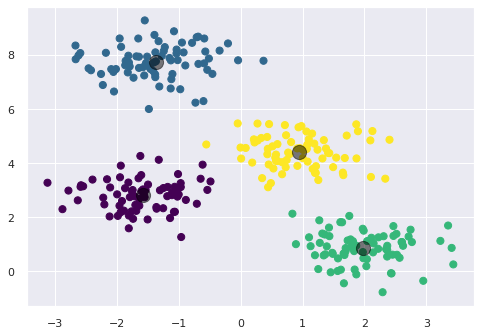

In [60]:
# TODO determine the best k for k-means
model = KMeans(n_clusters =4)
model.fit(X)
y_kmeans = model.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
# predicted centroids
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
print(y_kmeans)

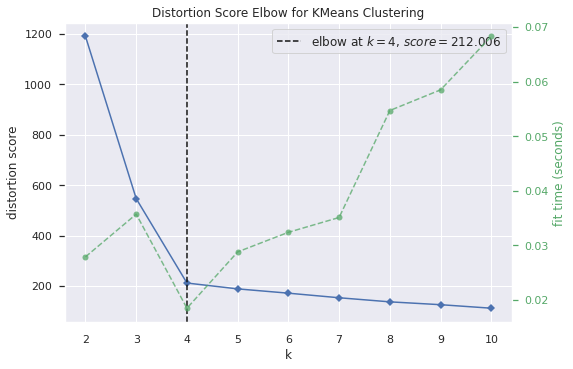

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [61]:
visualizer = KElbowVisualizer(model, K=(1,12))
visualizer.fit(X)
visualizer.show()

In [62]:
# prepare our predictions
from scipy.stats import mode

#        create a zero matrix with the same shape
labels = np.zeros_like(y_kmeans)
for i in range(4):
    # this is similar to another for loop to check every element of clusters
    # group all the elements of clusters == i, then assign these elements to mask
    mask = (y_kmeans == i)
    labels[mask] = mode(y_true[mask])[0]
    
print(labels.shape)
print(labels)

                                                    

(300,)
[1 3 0 3 1 1 2 0 3 3 2 3 0 3 1 0 0 1 2 2 1 1 0 2 2 0 1 0 2 0 3 3 0 3 3 3 3
 3 2 1 0 2 0 0 2 2 3 2 3 1 2 1 3 1 1 2 3 2 3 1 3 0 3 2 2 2 3 1 3 2 0 2 3 2
 2 3 2 0 1 3 1 0 1 1 3 0 1 0 3 3 0 1 3 2 2 0 1 1 0 2 3 1 3 1 0 1 1 0 3 0 2
 2 1 3 1 0 3 1 1 0 2 1 2 1 1 1 1 2 1 2 3 2 2 1 3 2 2 3 0 3 3 2 0 2 0 2 3 0
 3 3 3 0 3 0 1 2 3 2 1 0 3 0 0 1 0 2 2 0 1 0 0 3 1 0 2 3 1 1 0 2 1 0 2 2 0
 0 0 0 1 3 0 2 0 0 2 2 2 0 2 3 0 2 1 2 0 3 2 3 0 3 0 2 0 0 3 2 2 1 1 0 3 1
 1 2 1 2 0 3 3 0 0 3 0 1 2 0 1 2 3 2 1 0 1 3 3 3 3 2 2 3 0 2 1 0 2 2 2 1 1
 3 0 0 2 1 3 2 0 3 0 1 1 2 2 0 1 1 1 0 3 3 1 1 0 1 1 1 3 2 3 0 1 1 3 3 3 1
 1 0 3 2]


In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, labels)

1.0

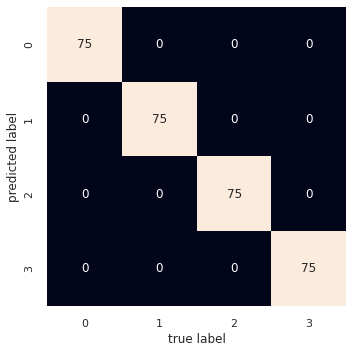

In [66]:
# To Draw confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_true, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= range(4),
            yticklabels= range(4))
plt.xlabel('true label')
plt.ylabel('predicted label');